# Multiple linear regression

In this notebook, we will see how to do multiple linear regression in Python using statsmodels and scikit-learn.

First we import the standard packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#from scipy import stats

import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

As example data, we will use the Ames housing data, see kaggle: https://www.kaggle.com/datasets/marcopale/housing?resource=download. It is also available on Moodle.

In [2]:
ames = pd.read_csv("AmesHousing.csv")

In [3]:
ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

As we now have more than one predictor/feature/independent variable, we cannot visualize the linear relationship anymore. thus we will skip the plotting.

Now, however, we have a more complex dataset and we need to do a bit of preprocessing before we can use it for multiple linear regression.

For simplicity we will only use the following predictor variable: 

- `Lot Area` (the size of the lot in square feet)
- `Overall Cond` (rating of the overall condition of the house)
- `Year Built` (Original construction year)
- `Gr Liv Area` (Above grade (ground) living area in square feet)
- `TotRms AbvGrd`(Total rooms above grade, excluding bathrooms)
- `Mo Sold` (Month Sold)
- `Yr Sold` (Year Sold)

In [5]:
X_ames = ames[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd", "Mo Sold", "Yr Sold"]]
X_ames

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold
0,31770,5,1960,1656,7,5,2010
1,11622,6,1961,896,5,6,2010
2,14267,6,1958,1329,6,6,2010
3,11160,5,1968,2110,8,4,2010
4,13830,5,1997,1629,6,3,2010
...,...,...,...,...,...,...,...
2925,7937,6,1984,1003,6,3,2006
2926,8885,5,1983,902,5,6,2006
2927,10441,5,1992,970,6,7,2006
2928,10010,5,1974,1389,6,4,2006


For the response/target/dependent variable, we use `SalePrice`

In [6]:
y = ames["SalePrice"]

## Fitting a multiple linear regression model using OLS and statsmodels

We can fit a multiple regression model to our data using OLS just as for simple linear regression.

We add an intercept to X as in the case of simple linear regression

In [7]:
X_ames_wInt = sm.add_constant(X_ames)

In [8]:
X_ames_wInt

,const,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold
0,1.0,31770,5,1960,1656,7,5,2010
1,1.0,11622,6,1961,896,5,6,2010
2,1.0,14267,6,1958,1329,6,6,2010
3,1.0,11160,5,1968,2110,8,4,2010
4,1.0,13830,5,1997,1629,6,3,2010
...,...,...,...,...,...,...,...,...
2925,1.0,7937,6,1984,1003,6,3,2006
2926,1.0,8885,5,1983,902,5,6,2006
2927,1.0,10441,5,1992,970,6,7,2006
2928,1.0,10010,5,1974,1389,6,4,2006


We can now with a multiple linear regression model using OLS just as before

In [9]:
mulinreg_model = sm.OLS(y, X_ames_wInt).fit()

We can get a lot of information about our model from the summary method.

In [10]:
mulinreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     919.9
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        21:18:00   Log-Likelihood:                -35526.
No. Observations:                2930   AIC:                         7.107e+04
Df Residuals:                    2922   BIC:                         7.112e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.542e+05   1.28e+06     -0.747      0.455   -3.46e+06    1.55e+06
Lot Area          0.9293      0.110      8.481      0.000       0.714       1.144
Overall Cond   9949.2562    800.949     12.422      0.000    8378.774    1.15e+04
Year Built     1206.4061     30.489     39.569      0.000    1146.624    1266.188
Gr Liv Area     106.0564      2.928     36.219      0.000     100.315     111.798
TotRms AbvGrd -5365.4887    901.843     -5.949      0.000   -7133.801   -3597.176
Mo Sold          80.8988    308.220      0.262      0.793    -523.451     685.249
Yr Sold        -713.7216    635.400     -1.123      0.261   -1959.598     532.155
==============================================================================
Omnibus:                      756.871   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29501.562
Skew:                           0.486   Prob(JB):                         0.00
Kurtosis:                      18.515   Cond. No.                     2.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation of the model**

We see a fairly high R-squared of 0.688.

The intercept, month sold, and year sold are not statistically significantly different from 0, the rest of the predictor variables are. Depending on the purpose of our modeling, it might make sense to remove the variables which coefficients are not significantly different from zero (more on this later).

### Retrieving coefficients and plotting fitted regression line

We can also get the parameters or coefficients from the fitted model the following way:

In [11]:
mulinreg_model.params

const           -954221.497645
Lot Area              0.929348
Overall Cond       9949.256234
Year Built         1206.406089
Gr Liv Area         106.056356
TotRms AbvGrd     -5365.488711
Mo Sold              80.898798
Yr Sold            -713.721631
dtype: float64

We can get the predictions as before using the predict method

In [12]:
pred_y = mulinreg_model.predict()
pred_y

array([193501.02715214, 116141.22885577, 155537.04976172, ...,
       147911.46814816, 169990.52615548, 241826.56030947], shape=(2930,))

### Model performance measures

We can also get the R-squared directly from the fitted model object.

In [13]:
mulinreg_model.rsquared

np.float64(0.6878529799308686)

In [14]:
mulinreg_model.rsquared_adj

np.float64(0.687105194461846)

We can get the residuals of the model also

In [15]:
mulinreg_model.resid

0       21498.972848
1      -11141.228856
2       16462.950238
3       17298.391471
4      -33905.716174
            ...     
2925    -6558.652456
2926    -2680.505354
2927   -15911.468148
2928        9.473845
2929   -53826.560309
Length: 2930, dtype: float64

Using these, we can calculate the *MAE* (Mean Absolute Error).

In [16]:
np.mean(np.abs(mulinreg_model.resid))

np.float64(29368.01827376311)

and the *MSE* (Mean Squared Error).

In [17]:
np.mean(mulinreg_model.resid**2)

np.float64(1991406060.2484136)

and the *RMSE* (Root Mean Squared Error).

In [18]:
np.sqrt(np.mean(mulinreg_model.resid**2))

np.float64(44625.1729436247)

## Fitting multiple linear regression using scikit-learn

We can also use the scikit-learn package to fit a multiple regression model.

Then we define a linear regression mode.

In [19]:
mulinreg_model_scikit = linear_model.LinearRegression()

We can now fit the model.

In [20]:
mulinreg_model_scikit.fit(X_ames, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Getting the coefficient in scikit-learn will give us all the coefficient except the coefficient for the intercept. That we have to get seperately.

In [21]:
mulinreg_model_scikit.coef_

array([ 9.29348148e-01,  9.94925623e+03,  1.20640609e+03,  1.06056356e+02,
       -5.36548871e+03,  8.08987983e+01, -7.13721631e+02])

In [22]:
mulinreg_model_scikit.intercept_

np.float64(-954221.4976444518)

We see that we get the same value as for statsmodels OLS.

To get the prediction of the model, we can use the `.predict` method again.

In [23]:
mulinreg_model_scikit.predict(X_ames)

array([193501.02715213, 116141.22885574, 155537.0497617 , ...,
       147911.46814813, 169990.52615546, 241826.56030945], shape=(2930,))

We can use the metrics submodule from scikit-learn again to calculate the performance of the multiple linear regression model.

All of these take the true and the predicted values as arrays. Thus, we first define a variable for the predicted.

In [24]:
y_pred = mulinreg_model_scikit.predict(X_ames)

In [25]:
r2_score(y, y_pred)

0.6878529799308687

In [26]:
mean_absolute_error(y, y_pred)

29368.018273761503

In [27]:
mean_squared_error(y, y_pred)

1991406060.2484128

In [28]:
root_mean_squared_error(y, y_pred)

44625.17294362469

## Dealing with categorical variables

We will use the categorical variable `Bldg Type` (Type of dwelling) from the ames dataset for these examples.

In [29]:
ames[["Bldg Type"]].groupby(ames["Bldg Type"]).count()

,Bldg Type
Bldg Type,
1Fam,2425
2fmCon,62
Duplex,109
Twnhs,101
TwnhsE,233


We use the `get_dummies`from pandas.

In [30]:
pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int")

,2fmCon,Duplex,Twnhs,TwnhsE
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2925,0,0,0,0
2926,0,0,0,0
2927,0,0,0,0
2928,0,0,0,0


In [31]:
X_ames_wInt = X_ames_wInt.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))

X_ames = X_ames.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))

In [32]:
X_ames_wInt

,const,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,2fmCon,Duplex,Twnhs,TwnhsE
0,1.0,31770,5,1960,1656,7,5,2010,0,0,0,0
1,1.0,11622,6,1961,896,5,6,2010,0,0,0,0
2,1.0,14267,6,1958,1329,6,6,2010,0,0,0,0
3,1.0,11160,5,1968,2110,8,4,2010,0,0,0,0
4,1.0,13830,5,1997,1629,6,3,2010,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.0,7937,6,1984,1003,6,3,2006,0,0,0,0
2926,1.0,8885,5,1983,902,5,6,2006,0,0,0,0
2927,1.0,10441,5,1992,970,6,7,2006,0,0,0,0
2928,1.0,10010,5,1974,1389,6,4,2006,0,0,0,0


In [33]:
X_ames

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,2fmCon,Duplex,Twnhs,TwnhsE
0,31770,5,1960,1656,7,5,2010,0,0,0,0
1,11622,6,1961,896,5,6,2010,0,0,0,0
2,14267,6,1958,1329,6,6,2010,0,0,0,0
3,11160,5,1968,2110,8,4,2010,0,0,0,0
4,13830,5,1997,1629,6,3,2010,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,6,1984,1003,6,3,2006,0,0,0,0
2926,8885,5,1983,902,5,6,2006,0,0,0,0
2927,10441,5,1992,970,6,7,2006,0,0,0,0
2928,10010,5,1974,1389,6,4,2006,0,0,0,0


Note that it is the *1Fam* building type that is left out, thus it will be the reference type used in interpreting the regression coefficent for this categorical variable.

We can now retrain our multiple regression models

In [34]:
mulinreg_model = sm.OLS(y, X_ames_wInt).fit()

In [35]:
mulinreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     630.2
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        21:18:00   Log-Likelihood:                -35450.
No. Observations:                2930   AIC:                         7.092e+04
Df Residuals:                    2918   BIC:                         7.099e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.222e+06   1.25e+06     -0.980      0.327   -3.67e+06    1.22e+06
Lot Area          0.7553      0.111      6.799      0.000       0.538       0.973
Overall Cond   8991.1985    788.797     11.399      0.000    7444.543    1.05e+04
Year Built     1201.1154     31.212     38.482      0.000    1139.915    1262.315
Gr Liv Area     102.1397      2.920     34.974      0.000      96.413     107.866
TotRms AbvGrd -3667.9599    943.130     -3.889      0.000   -5517.228   -1818.692
Mo Sold         207.2278    301.122      0.688      0.491    -383.206     797.662
Yr Sold        -573.0787    619.880     -0.924      0.355   -1788.525     642.368
2fmCon        -1.298e+04   5766.250     -2.250      0.024   -2.43e+04   -1669.976
Duplex        -4.392e+04   4450.574     -9.868      0.000   -5.26e+04   -3.52e+04
Twnhs         -3.489e+04   4591.001     -7.599      0.000   -4.39e+04   -2.59e+04
TwnhsE        -1412.1791   3290.258     -0.429      0.668   -7863.643    5039.285
==============================================================================
Omnibus:                      798.044   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32278.725
Skew:                           0.554   Prob(JB):                         0.00
Kurtosis:                      19.223   Cond. No.                     2.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
mulinreg_model.params["2fmCon"]

np.float64(-12976.308238180816)

**Interpretation of the model**

We can see that we increased the R-squared of the model, and several of the building types are significant. As we are dealing with multiple regression, we should actually look at adjusted R-squared instead of R-squared. But Adjusted R-squared has also improved.

That the coefficient for 2fmCon is -12976 (-1.298e+04) means that the selling price for a 2fmCon building is 12976 less than a 1Fam building, everying else being equal.

Calculating performance metrics.

In [37]:
pred_y = mulinreg_model.predict()
pred_y

array([194052.08547845, 118942.67555318, 157895.73488302, ...,
       152683.90746696, 172913.10991291, 248299.05183791], shape=(2930,))

In [38]:
r2_score(y, pred_y)

0.7037664832063703

In [39]:
root_mean_squared_error(y, pred_y)

43472.77994219688

We can see that we do get a better performance.

Training the model with scikit-learn

In [40]:
mulinreg_model_sk = linear_model.LinearRegression()

In [41]:
mulinreg_model_sk.fit(X_ames, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [42]:
y_pred_sk = mulinreg_model_sk.predict(X_ames)

In [43]:
r2_score(y, y_pred_sk)

0.7037664832063701

In [44]:
root_mean_squared_error(y, y_pred_sk)

43472.77994219689

## Looking at assumptions and problems

We will now look at the assumptions and potential problems for our multiple linear regression model.

If these assumptions are not meet, it means that we cannot completely trust the statistical calculations such as the p-values. Moreover, our evaluation metrics might not truly represent the performance of our model.

### Non-linearity of the data

One of the assumptions of linear regression is that there is a linear relationship between the independent (X) variables and the dependent variable (y). 

For simple linear regression, we can make a scatterplot of the x and y variable and visually inspect for linear relationship. However, for multiple linear regression, we cannot do that. Instead, we can plot the residuals versus the predicted values:

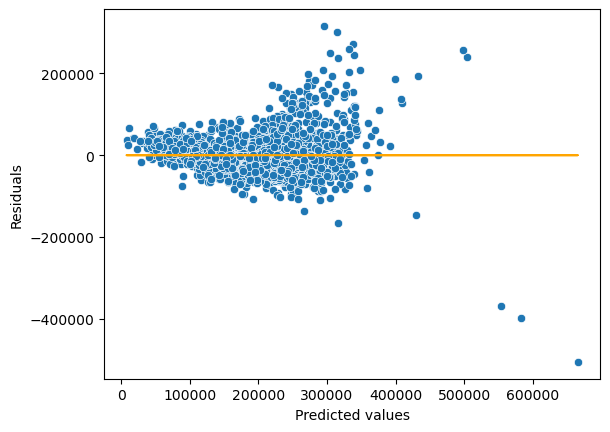

In [45]:
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

They look like they go up a bit, maybe the relationship is not quite linear, but the points almost fall equally along the x-axis. In other words, there is no clear pattern suggesting that the data is not approximately linear.

### Correlation of error terms 

Another assumption of linear regression is that the error terms are uncorrelated, in other words, the i'th error term $e_i$ does not tell us anything about i+1'th error term $e_{i+1}$. Thus, to investigate this, we can plot the residuals in order of their appearance (or by time, if there is a time variable). As we have no time variable, we can instead plot the residuals versus their row number.

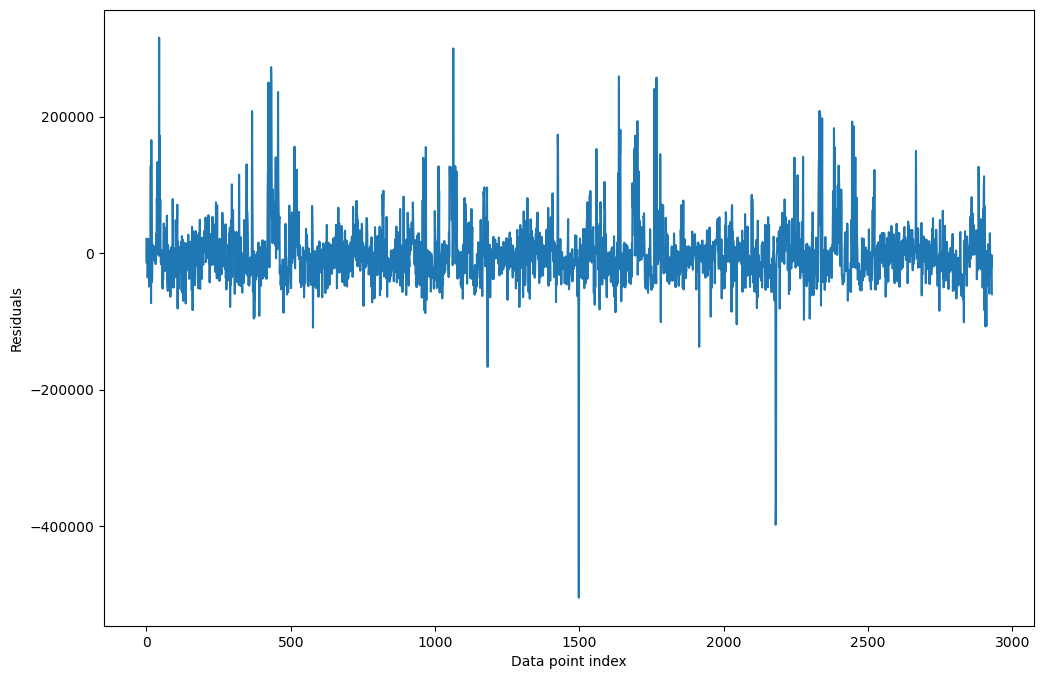

In [46]:
plt.rc("figure", figsize=(12, 8))
sns.lineplot(x = range(0,len(mulinreg_model.resid)), y = mulinreg_model.resid)
plt.ylabel("Residuals")
plt.xlabel("Data point index")
plt.show()

It is actually a bit hard to see from this plot if there is any correlation between the error terms, in terms of longer sections of value above or below 0. However, there are no clear such sections or pattern, so there is no obvious correlation, at least. Thinking about the data, it is also not obvious how a correlation among errors should have arisen.

### Non-constant variance of error terms

Another assumption of linear regression is that the error terms have constant variance. One common way of seeing non-constant error terms it to look at the plot of residuals versus predicted values and look whether the variance increase as the predicted values do - it will look like a funnel. So let us look at this plot again:

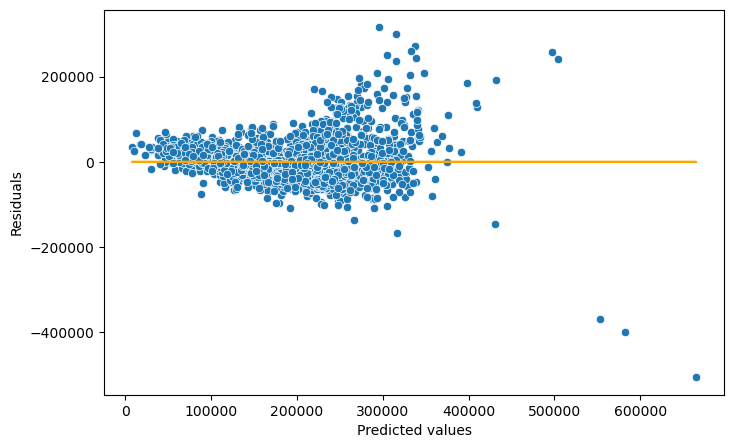

In [47]:
plt.rc("figure", figsize=(8, 5))
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

It indeed looks like there is a bit of a funnel, that is, an increase in variance. Thus, the assumption of constant variance of the error terms might indeed be violated.

 One possible solution would be to transform the dependent/target variable $y$ to $log(y)$ instead. This will potentially work in this case, but it will also make the interpretation of the model harder (the coefficient will mean something else) and we need to transform each prediction as well to get back the price of the house. We will not do this not, however.

### Outliers

Outliers in regard to linear regression models, are points for which the predicted value is very far from the actual values. These we can also spot in the residual vs predicted values plot. So let us not make the plot again, but just look at the plot above.

The three points, at the bottom right, looks like they could be outliers as their absolute residual values are quite high. Thus, it would make sense to investigate those point further to see if there are any errors in the data or other reasons from them being outliers.

### High leverage points

High leverage points are a bit like residuals. They are point that has a high influence on how the model looks. In simple linear regression, this means that a high leverage point might heavily affect where the regression line lies. Note that outliers are extreme values in a sense, but they do not need to have high leverage as they might not affect the actual model fit that much.

High leverage points are usually points that have an x-value far away from the other x-values in the dataset. This is easy to spot in simple linear regression where we only have on x variable. However, it is much harder to spot directly for multiple linear regression. Luckily, there is a leverage statistics we can calculate for each point based on a linear regression model, which we can use to make a "Leverage plot".

We can calculate the leverage statistics for each point in the following for statsmodels (does not work for scikit-learn models):

In [48]:
leverageStats = mulinreg_model.get_influence().hat_matrix_diag
leverageStats

array([0.00444033, 0.00197029, 0.0015872 , ..., 0.00230223, 0.00157751,
       0.00310069], shape=(2930,))

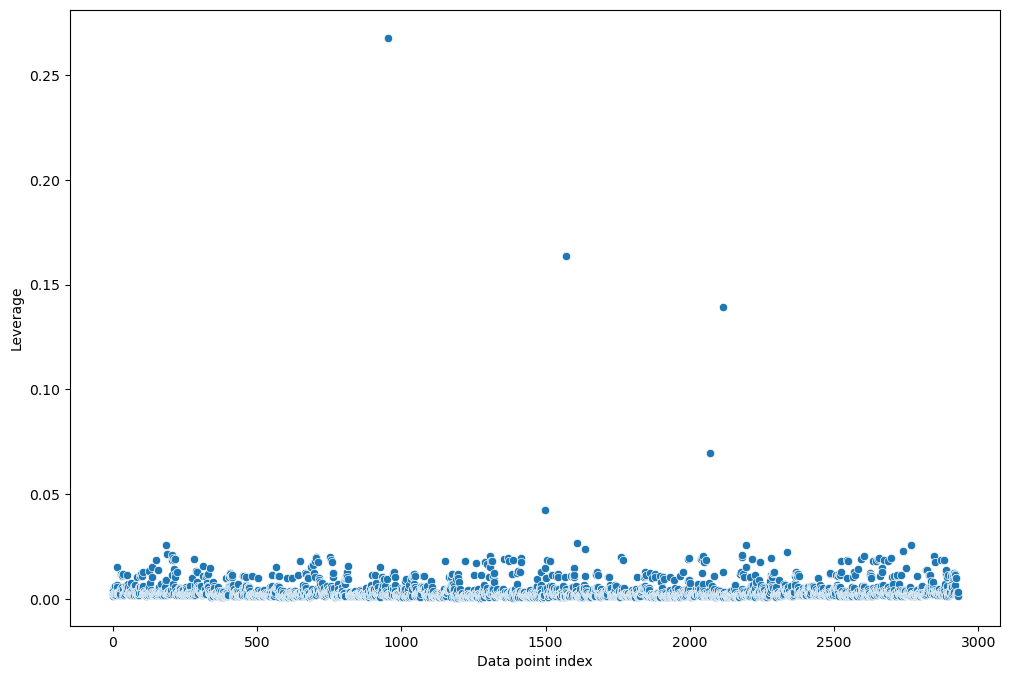

In [49]:
plt.rc("figure", figsize=(12, 8))
sns.scatterplot(x = range(0, len(leverageStats)), y = leverageStats)
plt.ylabel("Leverage")
plt.xlabel("Data point index")
plt.show()

Here there are clearly 3(/4) point that stands out with much higher leverage than the other points. Thus, it could again be useful to investigate these points further. (We will not do that now.)

### Collinearity

Collinearity can also be a problem for linear regression models and refers to the existence of high correlation between two or more of the independent/predictor variables. If two predictor variables are highly correlated, it can be hard/impossible for a linear regression model to separate out the effect on the response variable, coming from each of them - one might have a really high positive effect, while the other might have a really high negative effect, but in reality neither of them might have a big impact on the response variable.

The easiest way to spot collinearity between any pair of variables is to look at the correlation matrix:

In [50]:
X_ames.corr()

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,2fmCon,Duplex,Twnhs,TwnhsE
Lot Area,1.000000,-0.034759,0.023258,0.285599,0.216597,0.003859,-0.023085,0.052667,-0.019280,-0.186931,-0.199084
Overall Cond,-0.034759,1.000000,-0.368773,-0.115643,-0.089816,-0.007295,0.031207,0.008717,-0.099604,-0.016627,-0.126236
Year Built,0.023258,-0.368773,1.000000,0.241726,0.111919,0.014577,-0.013197,-0.191510,-0.026170,0.079620,0.240864
Gr Liv Area,0.285599,-0.115643,0.241726,1.000000,0.807772,0.043665,-0.026489,0.005448,0.060802,-0.094381,-0.091459
TotRms AbvGrd,0.216597,-0.089816,0.111919,0.807772,1.000000,0.043784,-0.030498,0.068660,0.199192,-0.131733,-0.221560
Mo Sold,0.003859,-0.007295,0.014577,0.043665,0.043784,1.000000,-0.155554,-0.044034,0.047477,0.005638,-0.009453
Yr Sold,-0.023085,0.031207,-0.013197,-0.026489,-0.030498,-0.155554,1.000000,-0.014425,0.017592,-0.002608,0.001750
2fmCon,0.052667,0.008717,-0.191510,0.005448,0.068660,-0.044034,-0.014425,1.000000,-0.028901,-0.027781,-0.043216
Duplex,-0.019280,-0.099604,-0.026170,0.060802,0.199192,0.047477,0.017592,-0.028901,1.000000,-0.037141,-0.057776
Twnhs,-0.186931,-0.016627,0.079620,-0.094381,-0.131733,0.005638,-0.002608,-0.027781,-0.037141,1.000000,-0.055537


We do not see any large correlation between the x variables here that could be a problem. The only correlation that is a bit (to?!) high is the one between `TotRms AbvGrd` and `Gr Liv Area`. The easiest way to deal with collinearity among the predictor variables is simply to drop one of them. Usually this well not make the model much worse as on the of the variable contains most of the information contained in the other variable.

It is worth noticing that we could potentially have collinearity between a set of more than two variables. this could create problems for the linear regression model, but it is not always possible to spot this from the pairwise correlation matrix.

## Improving the model

As we mentioned previously, it might sometimes make sense to remove variables whose coefficient is not significantly different from zero. It does not make sense to remove some of the dummy variables created from the same variable, so we would not remove `TwnhsE` even though it has a very high p-value. However, we might consider removing the intercept (`const`), `Mo Sold`, and `Yr Sold`.

If we just try to achieve the highest predictive accuracy (RMSE for instance), it makes good sense to try without those variables. If we are interested in answering the more inferential question of what affect the sales price of a house, it also makes sense to remove the non-significant variables. However, in some cases we might want to keep the variable if we are interested in those particular, that is if we are interested in the effect of the sales data on the price of the house. 

Let us say we are interested in predictive performance (measured by RMSE) and in achieving a high adjusted R-square, and let see if we can improve those by removing non-significant variables

In [51]:
X_ames_onlySig = X_ames_wInt.drop(columns=["const", "Mo Sold", "Yr Sold"])

In [52]:
mulinreg_model_onlySig = sm.OLS(y, X_ames_onlySig).fit()

In [53]:
mulinreg_model_onlySig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              4177.
Date:                Thu, 05 Feb 2026   Prob (F-statistic):                        0.00
Time:                        21:18:02   Log-Likelihood:                         -36034.
No. Observations:                2930   AIC:                                  7.209e+04
Df Residuals:                    2921   BIC:                                  7.214e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Lot Area          0.7486      0.136      5.524      0.000       0.483       1.014
Overall Cond  -3175.3116    878.564     -3.614      0.000   -4897.979   -1452.644
Year Built       26.3785      3.597      7.333      0.000      19.325      33.432
Gr Liv Area     124.1611      3.491     35.564      0.000     117.316     131.007
TotRms AbvGrd -6975.0315   1145.440     -6.089      0.000   -9220.983   -4729.080
2fmCon        -5.568e+04   6892.524     -8.079      0.000   -6.92e+04   -4.22e+04
Duplex        -5.279e+04   5415.692     -9.747      0.000   -6.34e+04   -4.22e+04
Twnhs         -1.838e+04   5576.121     -3.295      0.001   -2.93e+04   -7442.414
TwnhsE          2.22e+04   3941.639      5.632      0.000    1.45e+04    2.99e+04
==============================================================================
Omnibus:                      566.009   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11340.371
Skew:                           0.350   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     9.16e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now we clearly improved the adjusted R-square from $0.703$ to $0.928$, which is quite of an improvement! Let us see if we also improved RMSE:

In [54]:
pred_y_onlySig = mulinreg_model_onlySig.predict()
root_mean_squared_error(y, pred_y_onlySig)

53070.91135660218

Now, for predictive performance the model actually got worse, in the sense that RMSE increased substantially from $43473$ to $53070$. Leaving out variables never improve predictive performance (measured by RMSE) for linear regression when we measure RMSE on the same data as we trained on. However, as we previously talked about, we should never measure predictive performance on the same data as we trained the model. If we measure RMSE on data the model has not seen before, we might improve performance be removing some insignificant variables - this is especially true for other model types than linear regression.